In [1]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(5) # random seed for consistency

mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[1,0],[0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (2,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1])
cov_mat2 = np.array([[1,0],[0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class1_sample.shape == (2,20), "The matrix has not the dimensions 3x20"

In [3]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (2,40), "The matrix has not the dimensions 3x40"

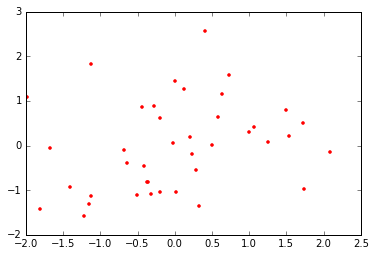

In [4]:
points = all_samples.T

#normalise data. THIS is neccesary as we are working with different units for different parameters..
n_data = (points - points.mean(axis=0)) / points.std(axis=0)
x, y = n_data.T#points.T
plt.plot(x, y, 'r.')

In [5]:

#mean = np.mean(points.T,axis=1)
#demeaned = points-mean
evals, evecs = np.linalg.eig(cov(n_data.T))

#evals,evecs are not guaranteed to be ordered
order = evals.argsort()[::-1]
print evals[order]
print evecs[:,order[0]]

[ 1.2847883   0.76649375]
[ 0.70710678  0.70710678]


In [6]:
#mean
m = n_data.mean(axis=0)

# eigenvector
e1 = evecs[:,order[0]]
e1v = evals[order[0]]

# coordinates first component l1 bottom, l2 top
l1 = np.array([([0, e1[0]*e1v]+m[0])[1],
               ([0, e1[1]*e1v]+m[1])[1]])
l2 = np.array([([0, e1[0]*e1v]-m[0])[1]*-1,
               ([0, e1[1]*e1v]-m[1])[1]*-1])

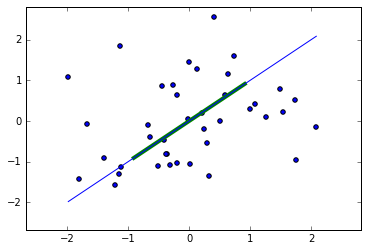

In [7]:
import matplotlib.pylab as plt
import numpy as np

def extended(x, y,x_in,y_in):
    """
    apply 1 dimensional least square polynomial fit to extend the eigenvector to
    extent of the data observations
    """

    xlim = [x_in.min(),x_in.max()]
    ylim = [y_in.min(),y_in.max()]

    x_ext = np.linspace(xlim[0], xlim[1], 100)
    p = np.polyfit(x, y , deg=1)
    y_ext = np.poly1d(p)(x_ext)

    return x_ext, y_ext

x_short = [l1[0],l2[0]] # get x_array of eigenvector + eigenvalue computation
y_short = [l1[1],l2[1]] # get y_array of eigenvector + eigenvalue computation
x_ext,y_ext = extended(x_short, y_short,x,y)

ax = plt.subplot(111)
ax.scatter(x,y)

ax.plot(x_short, y_short, color="g", lw=4, label="short")
ax.plot(x_ext, y_ext)

# set extent to x_ext and y_ext plus 35%
ax.set_xlim(x_ext[0] + (x_ext[0] * .35), x_ext[-1] + (x_ext[-1] * .35))
ax.set_ylim(y_ext[0] + (y_ext[0] * .35), y_ext[-1] + (y_ext[-1] * .35))

plt.show()